# Dependências

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu, linear
from keras.metrics import MAE
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Utils 

In [4]:
def plot_acc_loss(history):
    plt.figure()
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss')
    plt.legend()
    plt.tight_layout()

## Carrega dados de treinamento

In [5]:
data = pd.read_csv('data/data_train_fields.csv', sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5243 entries, 0 to 5242
Data columns (total 17 columns):
Id               5243 non-null int64
field            5243 non-null int64
age              5243 non-null int64
type             5243 non-null int64
harvest_year     5243 non-null int64
harvest_month    5243 non-null int64
production       5243 non-null float64
month            5243 non-null int64
year             5243 non-null int64
temperature      5243 non-null float64
dewpoint         5243 non-null float64
windspeed        5243 non-null float64
Soilwater_L1     5243 non-null float64
Soilwater_L2     5243 non-null float64
Soilwater_L3     5243 non-null float64
Soilwater_L4     5243 non-null float64
Precipitation    5243 non-null float64
dtypes: float64(9), int64(8)
memory usage: 696.4 KB


In [6]:
x, y = np.array(data.drop(labels=['production'], axis=1)), np.array(data.production).reshape(-1,1)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)

print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(3670, 16) (1573, 16) (3670, 1) (1573, 1)


In [8]:
std = StandardScaler()
std.fit(x_train)
x_train = std.transform(x_train)
x_val = std.transform(x_val)

In [10]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())

model.compile(optimizer='adam', loss="mean_absolute_error")
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_6 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________
None
Train on 3670 samples, validate on 1573 samples
Epoch 1/100
3670/3670 [==============================] - 0s 134us/step - loss: 0.1458 - val_loss: 0.0983
Epoch 2/100
3670/3670 [==============================] - 0s 41us/step - loss: 0.0864 - val_loss: 0.0887
Epoch 3/100
36

3670/3670 [==============================] - 0s 37us/step - loss: 0.0554 - val_loss: 0.0647
Epoch 71/100
3670/3670 [==============================] - 0s 31us/step - loss: 0.0559 - val_loss: 0.0649
Epoch 72/100
3670/3670 [==============================] - 0s 30us/step - loss: 0.0553 - val_loss: 0.0655
Epoch 73/100
3670/3670 [==============================] - 0s 31us/step - loss: 0.0552 - val_loss: 0.0661
Epoch 74/100
3670/3670 [==============================] - 0s 34us/step - loss: 0.0554 - val_loss: 0.0629
Epoch 75/100
3670/3670 [==============================] - 0s 33us/step - loss: 0.0554 - val_loss: 0.0655
Epoch 76/100
3670/3670 [==============================] - 0s 30us/step - loss: 0.0557 - val_loss: 0.0674
Epoch 77/100
3670/3670 [==============================] - 0s 34us/step - loss: 0.0554 - val_loss: 0.0646
Epoch 78/100
3670/3670 [==============================] - 0s 37us/step - loss: 0.0560 - val_loss: 0.0635
Epoch 79/100
3670/3670 [==============================] - 0s 52us/st

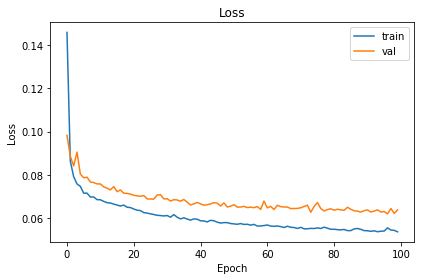

In [11]:
plot_acc_loss(history)

### Preparando arquivo de submissão 

In [12]:
df_test = pd.read_csv('data/data_test_fields.csv', sep=",")

x_test = np.array(df_test)
x_test = std.transform(x_test)
y_pred = model.predict(x_test)

df_test['production'] = MinMaxScaler().fit_transform(y_pred)

In [13]:
df_test.to_csv('data/submission.csv', sep=",", columns=['Id', 'production'], index=False)